# Machine Learning: Session 3

In [1]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

## Task 1. Different distance measures in KNN (1 point)

The goal of this task is to understand better how different distance measures can affect the KNN performance. In addition, we are going to test the effect of normalizing input features and using weighted averaging for the nearest neighbours.

**(a)** Load the "wine" dataset from sklearn datasets, put input features into pandas dataframe and name the columns with feature names. <br>
Report the number of features and the number of classes in the dataset.

In [2]:
# Load dataset
wine = datasets.load_wine()
# HINTS:
# wine.data contains numpy array of dataset input features
# wine.target contains labels of instances
# wine.feature_names contains features labels

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    wine_train = pd.DataFrame(
        data=np.c_[wine.data, wine.target],
        columns=wine.feature_names + ["target"],
    )
    display(wine_train.head())
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [3]:
wine_train.target.unique()

array([0., 1., 2.])

In [4]:
wine_train.shape

(178, 14)

**<font color='purple'>Answer to (a):</font>**
The number of features is $13$ and the number of classes is $3$.

**(b)** Split the dataset into 80% training data and 20% test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [5]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    X_train, X_test, y_train, y_test = train_test_split(
        wine_train[wine.feature_names],
        wine_train["target"],
        test_size=0.2,
        random_state=22,
    )
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

X_train shape: (142, 13)
X_test shape: (36, 13)


**<font color='purple'>Answer to (b):</font>** The number of instances in the training set is $142$ and in the test set is $36$.

**(c)** Use the KNN Classifier from Sklearn to fit a model for different values of K (3, 5, 7). Report test accuracy for each K. Report the best K to be used on this dataset.

In [6]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    Ks = [3, 5, 7]
    for k in Ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print("k =", k, "accuracy =", accuracy_score(y_test, y_pred))

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

k = 3 accuracy = 0.6666666666666666
k = 5 accuracy = 0.6944444444444444
k = 7 accuracy = 0.6666666666666666


**<font color='purple'>Answer to (c):</font>** The best K to be used on this dataset is $5$.

**(d)** Use the best value of K from the previous subtask, and try changing the distance metric used by KNN into euclidean, manhattan, chebyshev and minkowski with P = 3. Report the accuracy obtained with each metric. Report the best metric to be used on this dataset.

In [7]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    k = 5
    metrics = ["euclidean", "manhattan", "chebyshev"]
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print("metric =", metric, "accuracy =", accuracy_score(y_test, y_pred))

    # Using minkowski distance with p=3
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("metric =", "minkowski", "accuracy =", accuracy_score(y_test, y_pred))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

metric = euclidean accuracy = 0.6944444444444444
metric = manhattan accuracy = 0.7222222222222222
metric = chebyshev accuracy = 0.6666666666666666
metric = minkowski accuracy = 0.6944444444444444


**<font color='purple'>Answer to (d):</font>** The best metric to be used on this dataset is manhattan.

**(e)** Try to use weights for nearest neighbors according to the inverse of their distance from the test instance. Use the best K found in **(c)** and the best distance metric found in **(d)**. Report the accuracy and discuss whether it is better to use weights or not. (Hint: Read about `weights` parameter from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">HERE</a>)

In [8]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="manhattan")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("accuracy =", accuracy_score(y_test, y_pred))

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

accuracy = 0.8055555555555556


**<font color='purple'>Answer to (e):</font>** It's better to use weights.

**(f)** Standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). Predict the accuracy using best parameters found in **(c)**, **(d)**, and **(e)**. Is it better to standardize / normalize your features before using KNN? WHY?

In [9]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    from sklearn.preprocessing import StandardScaler

    std_scaler = StandardScaler()
    X_train_std = std_scaler.fit_transform(X_train)
    X_test_std = std_scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="manhattan")
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    print("accuracy =", accuracy_score(y_test, y_pred))

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

accuracy = 0.9444444444444444


**<font color='purple'>Answer to (f):</font>** It's better to standardize the features before using KNN. Because if the features are not normalized, the features with larger scales will have a higher impact on the prediction than the features with smaller scales.

**(g)** Based on your observations during this task, write out what have you learnt so far when using the KNN learning algorithm.

**<font color='purple'>Answer to (g):</font>** Upon researching about what insights I would gain about the dataset when using `weights = 'distance'` and `metric = 'manhattan'` in the KNN classifier and gaining a higher accuracy, I found the following.

Using `weights = 'distance'`: 
- Having a higher accuracy may indicate that the dataset is well separated 


Using `metric = 'manhattan'`: 
- Manhattan distance is more robust to outliers than the euclidean distance, so this dataset maybe have outliers.
- As it can be considered as a linear measure of dissimilarity, achieving higher accuracy with it suggests that the dataset may have linearly separable classes or exhibit a high degree of linear separability.


## Task 2. Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with a binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

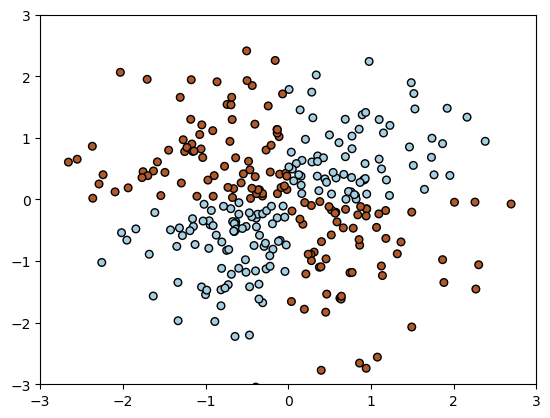

In [10]:
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(
    train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired, edgecolors="k"
)
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel. Please fill in the 2 gaps in the code.

In [11]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    svm_model = svm.SVC(kernel="linear")
    svm_model.fit(train_X, train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

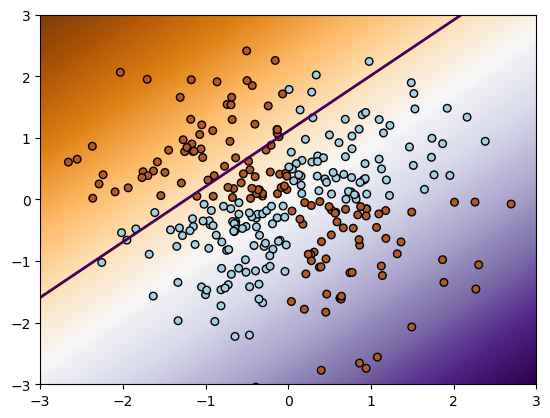

In [12]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))


def plot_svm(model, X, Y, ax=None):
    # plots the decision function for each datapoint on the grid

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if ax is None:
        plt.imshow(
            Z,
            interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            aspect="auto",
            origin="lower",
            cmap=plt.cm.PuOr_r,
        )
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(
            Z,
            interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            aspect="auto",
            origin="lower",
            cmap=plt.cm.PuOr_r,
        )
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
        ax.axis([-3, 3, -3, 3])


try:
    plot_svm(svm_model, train_X, train_Y)
except Exception as e:
    print("Exception:", e)

- **(b)** Can SVM with the linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>** No, SVM with the linear kernel cannot separate XOR data.


- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

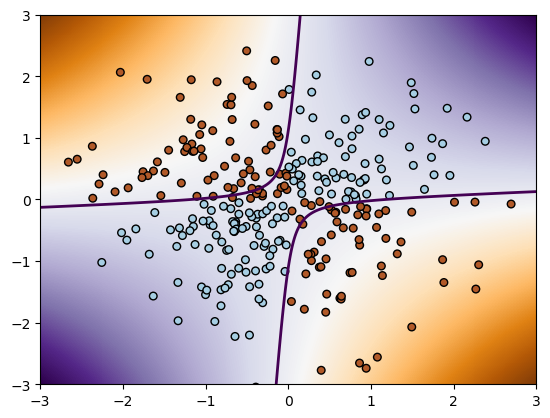

In [13]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 2
    svm_2nd_deg_model = svm.SVC(kernel="poly", degree=2)
    svm_2nd_deg_model.fit(train_X, train_Y)
    plot_svm(svm_2nd_deg_model, train_X, train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

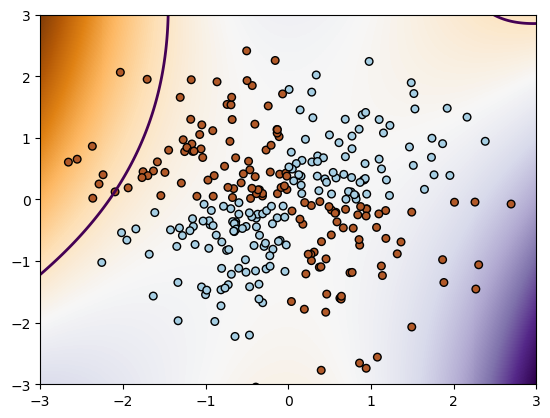

In [14]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 3
    svm_3rd_deg_model = svm.SVC(kernel="poly", degree=3)
    svm_3rd_deg_model.fit(train_X, train_Y)
    plot_svm(svm_3rd_deg_model, train_X, train_Y)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (c):</font>** 2nd degree polynomial kernel is able to learn the XOR function reasonably well.


- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

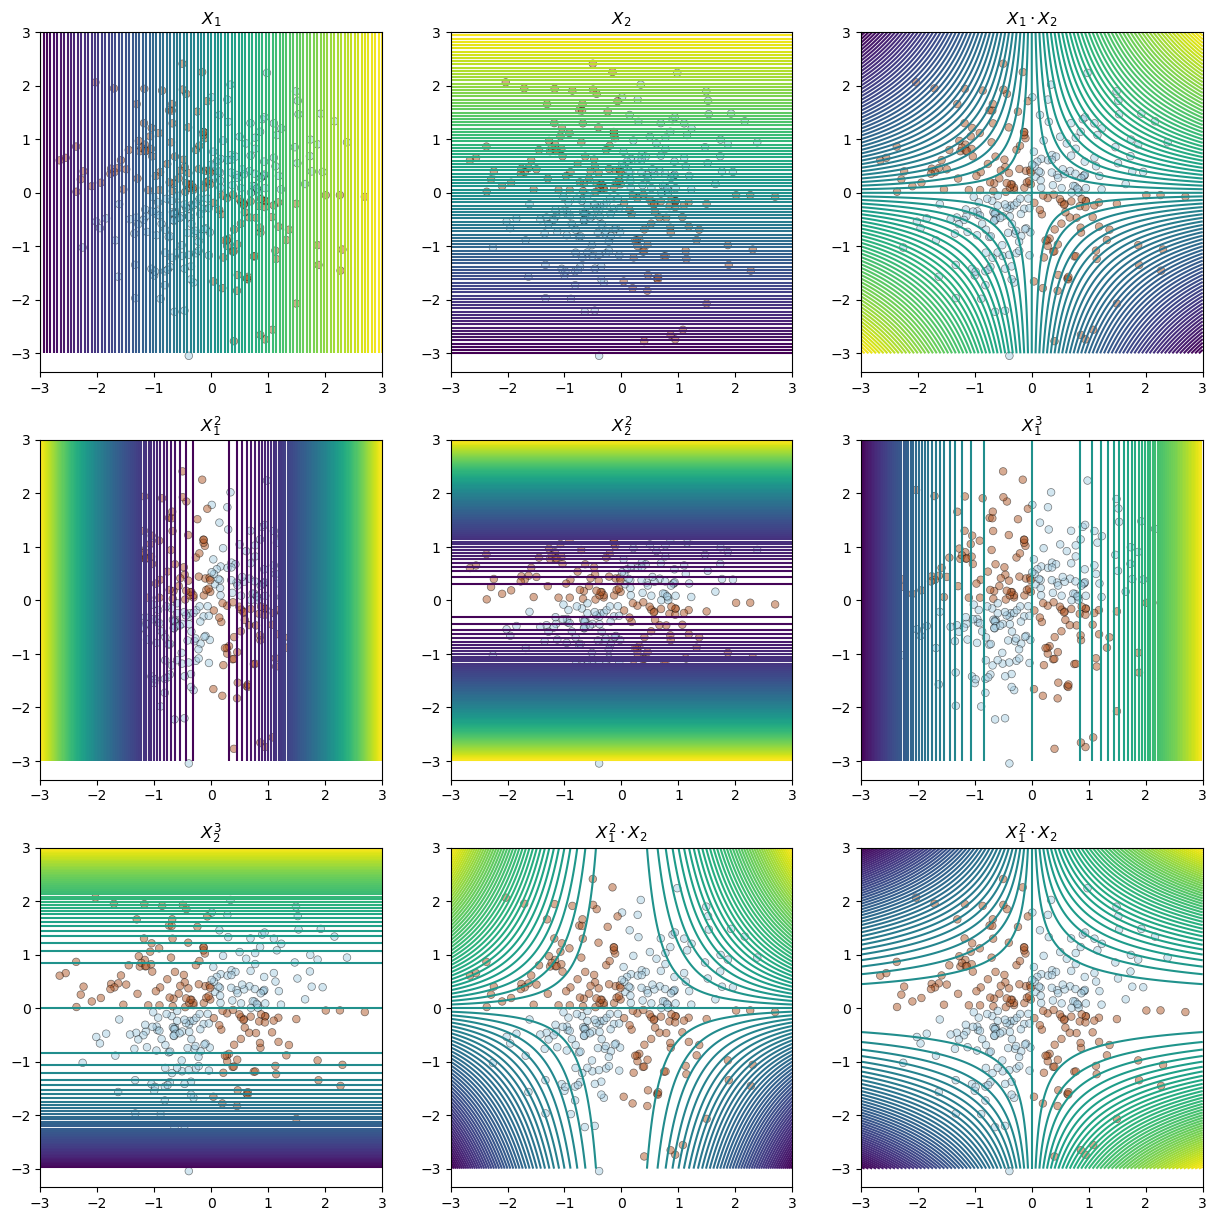

In [15]:
# plt.contour(xx, yy, yy*yy*xx)
# plt.title('X1.X2^2')
# plt.show()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Visualize rest of the features similarly as above
    poly_features = [
        (xx, r"$X_1$"),
        (yy, r"$X_2$"),
        (xx * yy, r"$X_1 \cdot X_2$"),
        (xx**2, r"$X_1^2$"),
        (yy**2, r"$X_2^2$"),
        (xx**3, r"$X_1^3$"),
        (yy**3, r"$X_2^3$"),
        (xx**2 * yy, r"$X_1^2 \cdot X_2$"),
        (xx * yy**2, r"$X_1^2 \cdot X_2$"),
    ]

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for i, ax in enumerate(axes.flatten()):
        ax.scatter(
            train_X[:, 0],
            train_X[:, 1],
            s=30,
            c=train_Y,
            cmap=plt.cm.Paired,
            edgecolors="k",
            alpha=0.5,
            linewidths=0.5,
        )
        ax.contour(xx, yy, poly_features[i][0], 100)
        ax.set_title(f"{poly_features[i][1]}")
    plt.show()

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (d):</font>** The most useful feature in discriminating the two classes is $x_1 . x_2$.


- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 51 of Lecture 05.

In [16]:
import sympy as sp

sp.init_printing(use_latex="mathjax")

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Example
    x1, x2, z1, z2 = sp.symbols("x1 x2 z1 z2")

    kappa = (x1 * z1 + x2 * z2) ** 2
    display(sp.expand(kappa))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

  2   2                     2   2
x₁ ⋅z₁  + 2⋅x₁⋅x₂⋅z₁⋅z₂ + x₂ ⋅z₂ 

- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x^2, y^2, \sqrt{2}xy)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>** Yes, the best discriminator $x_1 . x_2$ is present among the constructed features $\sqrt{2}xy$. This explains why polynomial kernel with degree 2 performed well in subtask **(c)**.


- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [17]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    display(sp.expand((x1 * z1 + x2 * z2) ** 3))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

  3   3       2      2             2      2     3   3
x₁ ⋅z₁  + 3⋅x₁ ⋅x₂⋅z₁ ⋅z₂ + 3⋅x₁⋅x₂ ⋅z₁⋅z₂  + x₂ ⋅z₂ 

**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x^3, y^3, \sqrt{3}x^2y, \sqrt{3}xy^2)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>** No, there's no best discriminator present among the constructed features. This explains why polynomial kernel with degree 3 performed not well in subtask **(c)**.


- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [18]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    display(sp.expand((x1 * z1 + x2 * z2 + 1) ** 3))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

  3   3       2      2          2   2          2      2                       
x₁ ⋅z₁  + 3⋅x₁ ⋅x₂⋅z₁ ⋅z₂ + 3⋅x₁ ⋅z₁  + 3⋅x₁⋅x₂ ⋅z₁⋅z₂  + 6⋅x₁⋅x₂⋅z₁⋅z₂ + 3⋅x₁

        3   3       2   2              
⋅z₁ + x₂ ⋅z₂  + 3⋅x₂ ⋅z₂  + 3⋅x₂⋅z₂ + 1

**<font color='purple'>Answer to (j):</font>**


- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Make the resulting plot and report if learning of XOR succeeded.

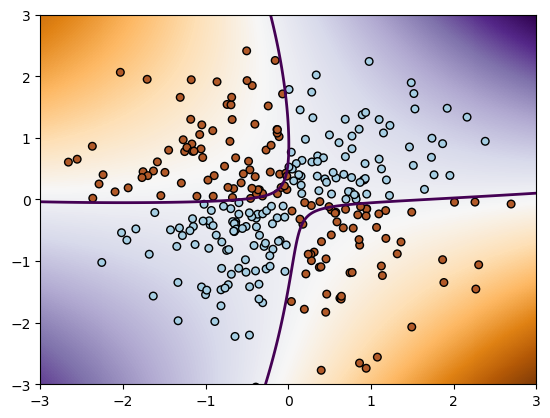

In [19]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    svm_3rd_deg_model = svm.SVC(kernel="poly", degree=3, coef0=1)
    svm_3rd_deg_model.fit(train_X, train_Y)
    plot_svm(svm_3rd_deg_model, train_X, train_Y)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (k):</font>** Yeah, it succeeded. Because the expanded feature space now contains the necessary feature $x_1 . x_2$.



## Task 3: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

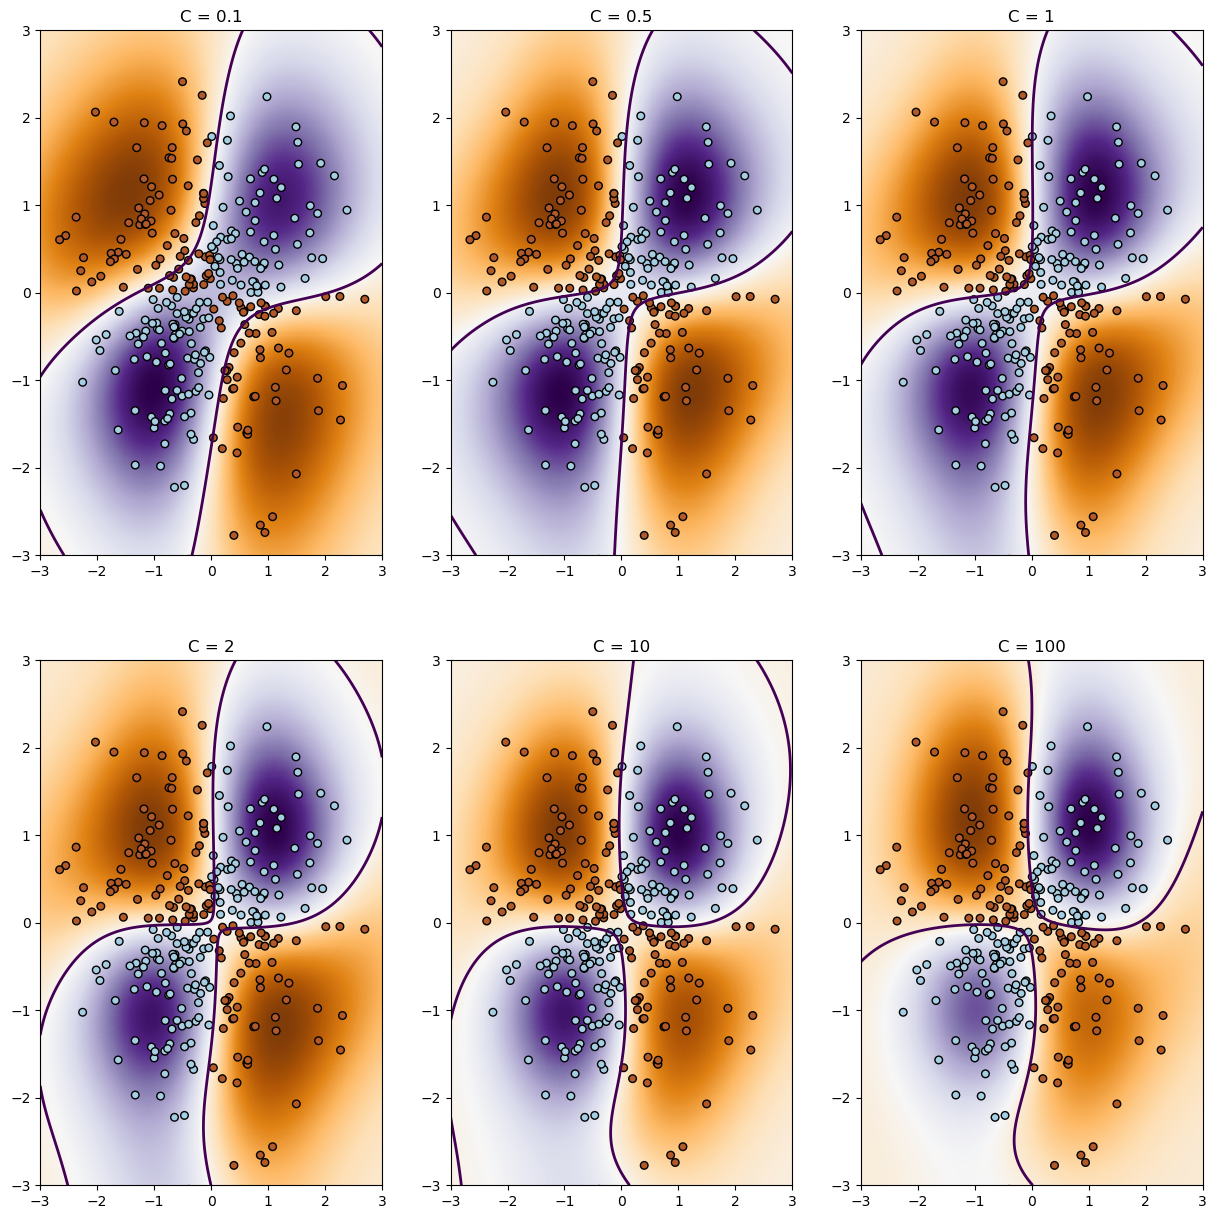

In [20]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    c_s = [0.1, 0.5, 1, 2, 10, 100]
    fig, axes = plt.subplots(2, 3, figsize=(15, 15))
    for c, ax in zip(c_s, axes.flatten()):
        svm_model = svm.SVC(kernel="rbf", C=c)
        svm_model.fit(train_X, train_Y)
        plot_svm(svm_model, train_X, train_Y, ax=ax)
        ax.set_title(f"C = {c}")
        
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (a):</font>** `C` is a regularization parameter, by increasing it, the model will be more sensitive to the training data. As it can be seen in the plots, by increasing `C`, the model will be more sensitive to the training data and the margin will be smaller.


- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

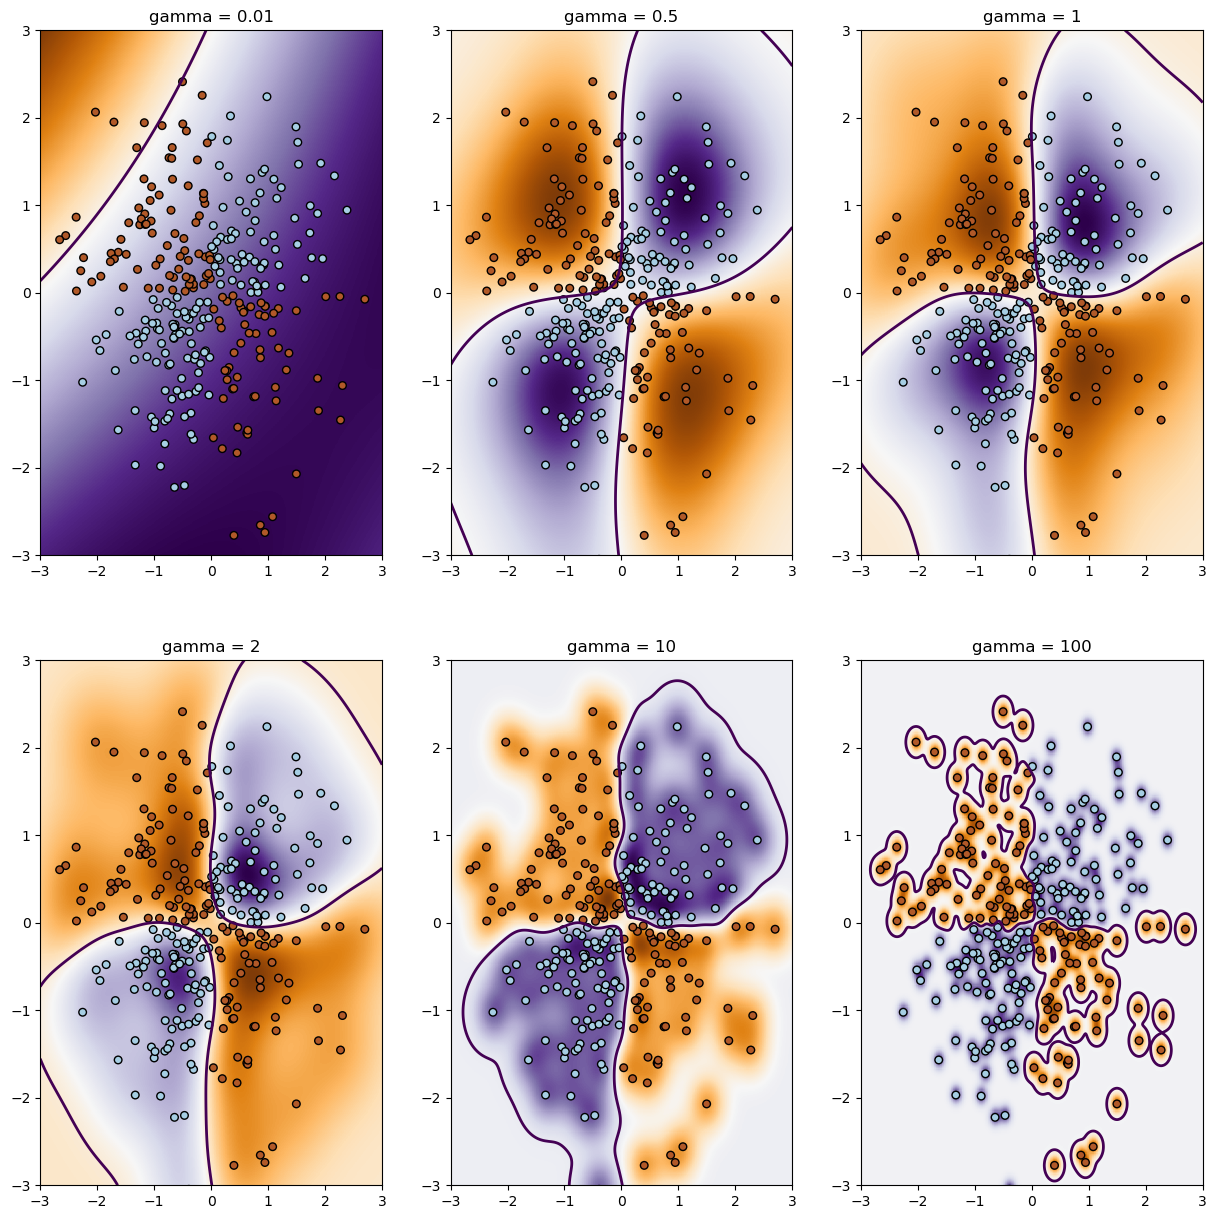

In [21]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError('You need to remove "raise NotImplementedErrors" lines after writing your code!')
    gammas = [0.01, 0.5, 1, 2, 10, 100]
    fig, axes = plt.subplots(2, 3, figsize=(15, 15))

    for gamma, ax in zip(gammas, axes.flatten()):
        svm_model = svm.SVC(kernel="rbf", gamma=gamma)
        svm_model.fit(train_X, train_Y)
        plot_svm(svm_model, train_X, train_Y, ax=ax)
        ax.set_title(f"gamma = {gamma}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>** $\gamma$ makes the gaussian curve narrower. The decision boundary will be more sensitive to the training data and the margin will be smaller.


## Task 4: Decision tree learning (2 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the notebook. The following code loads the dataset and prepares it for the task.

**Install graphiz package for decision tree visualization in case it is not installed**
!pip install graphviz

#### In case you still have some issues with graphviz package:
**For Windows Users**: You can download graphviz from [<a href = "https://graphviz.gitlab.io/_pages/Download/Download_windows.html">HERE</a>] Then add it to the system path using the following commands. <br>
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'```

**For Ubuntu Linux Users:** try to use the following command to install graphviz
```sudo apt-get install graphviz```

**For MAC Users:** Use the following package
```brew install graphviz```

In [22]:
np.random.seed(0)
data = pd.read_csv(
    "adult.data.csv",
    dtype="category",
    header=None,
    index_col=None,
    na_values=["NA", " ?", ""],
)
data.columns = [
    "age",
    "workclass",
    "not_needed1",
    "education1",
    "education",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "country",
    "income",
]
data.dropna(inplace=True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(
    [
        "not_needed1",
        "education1",
        "relationship",
        "capital_gain",
        "capital_loss",
        "country",
    ],
    axis=1,
    inplace=True,
)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size=len(a), replace=False)
data = data.loc[np.concatenate([a, b])]

In [23]:
data.head()

age          workclass  education       marital_status        occupation  \
7    52   Self-emp-not-inc          9   Married-civ-spouse   Exec-managerial   
8    31            Private         14        Never-married    Prof-specialty   
9    42            Private         13   Married-civ-spouse   Exec-managerial   
10   37            Private         10   Married-civ-spouse   Exec-managerial   
11   30          State-gov         13   Married-civ-spouse    Prof-specialty   

                   race      sex  hours_per_week income  
7                 White     Male              45   >50K  
8                 White   Female              50   >50K  
9                 White     Male              40   >50K  
10                Black     Male              80   >50K  
11   Asian-Pac-Islander     Male              40   >50K

The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [24]:
# Equivalent to one-hot encoding
data = pd.get_dummies(
    data, columns=["workclass", "marital_status", "occupation", "race", "sex"]
)
data.head()

age  education  hours_per_week income  workclass_ Federal-gov  \
7    52          9              45   >50K                   False   
8    31         14              50   >50K                   False   
9    42         13              40   >50K                   False   
10   37         10              80   >50K                   False   
11   30         13              40   >50K                   False   

    workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
7                  False                    False               False   
8                  False                    False                True   
9                  False                    False                True   
10                 False                    False                True   
11                 False                    False               False   

    workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
7                     False                         True  ...   
8                     False                        False  ...   
9                     False                        False  ...   
10                    False                        False  ...   
11                    False                        False  ...   

    occupation_ Sales  occupation_ Tech-support  occupation_ Transport-moving  \
7               False                     False                         False   
8               False                     False                         False   
9               False                     False                         False   
10              False                     False                         False   
11              False                     False                         False   

    race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
7                      False                     False        False   
8                      False                     False        False   
9                      False                     False        False   
10                     False                     False         True   
11                     False                      True        False   

    race_ Other  race_ White  sex_ Female  sex_ Male  
7         False         True        False       True  
8         False         True         True      False  
9         False         True        False       True  
10        False        False        False       True  
11        False        False        False       True  

[5 rows x 40 columns]

We will consider the binary classification task of predicting income:

In [25]:
data.income.value_counts()

income
>50K     7508
<=50K    7508
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["income"], axis=1), data["income"], test_size=0.5, random_state=0
)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [27]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError(
    #     'You need to remove "raise NotImplementedErrors" lines after writing your code!'
    # )
    # fit the model here:
    dt = DecisionTreeClassifier(max_depth=2)
    dt.fit(X_train, y_train)

    # Train accuracy
    train_pred = dt.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("Train accuracy:", train_acc)

    # Test accuracy
    test_pred = dt.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print("Test accuracy:", test_acc)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

Train accuracy: 0.7559936068193926
Test accuracy: 0.7566595631326585


**<font color='purple'>Answer to (a):</font>**
The train accuracy is $0.755$ and the test accuracy is $0.756$. It seems that the model is underfitting.

- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

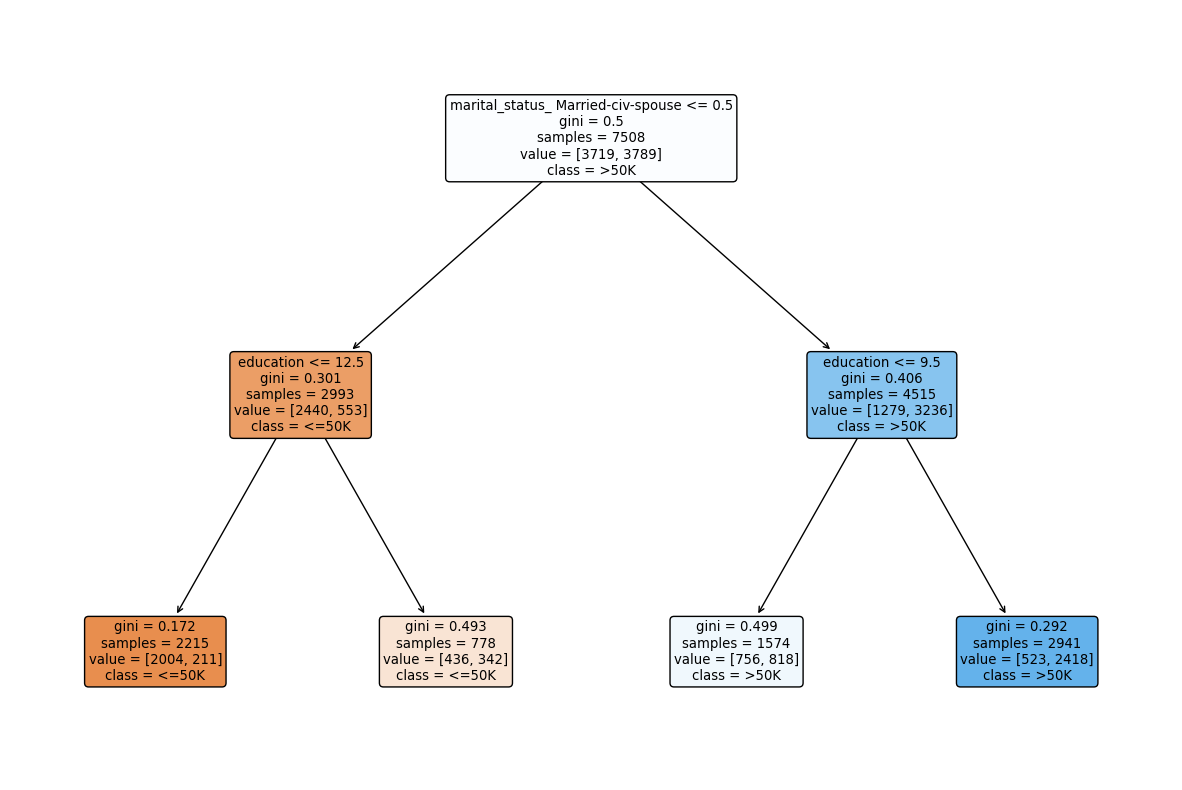

In [28]:
try:
    """I used plot_tree function instead of export_graphviz because I was getting an error with graphviz"""
    plt.figure(figsize=(15, 10))
    tree.plot_tree(
        dt,
        feature_names=X_train.columns,
        class_names=["<=50K", ">50K"],
        filled=True,
        rounded=True,
    )
    # dot_data = tree.export_graphviz(
    #     dt,
    #     out_file=None,
    #     feature_names=X_train.columns,
    #     class_names=["<=50K", ">50K"],
    #     filled=True,
    #     rounded=True,
    #     special_characters=False,
    # )
    # graph = graphviz.Source(dot_data)
    # graph
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>**
The tree makes the following decisions on different feature values:
- If the marital status is married civ spouse:
    - If the education num is less than or equal to 12.5:
        - The person's income is less than or equal to 50K, with a probability of 0.9.
    - If the education num is greater than 12.5:
        - The person's income is less than or equal to 50K, with a probability of 0.56. 
- If the marital status is not married civ spouse:
    - If the education num is less than or equal to 9.5:
        - The person's income is more than 50K, with a probability of 0.51.
    - If the education num is greater than 9.5:
        - The person's income is more than 50K, with a probability of 0.82.
    


**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**
1. Binary features: The decision tree will split the data into two groups, one with the feature value equal to 0 and the other with the feature value equal to 1.
2. Categorical features: The decision tree will split the data into groups, one for each possible value of the feature.
3. Continuous features: The decision tree will split the continuous data into groups, each group will contain a range of values of the feature. And then it will be handled as a categorical feature.


- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [29]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError(
    #     'You need to remove "raise NotImplementedErrors" lines after writing your code!'
    # )
    default_dt = DecisionTreeClassifier()
    default_dt.fit(X_train, y_train)

    # Train accuracy
    train_pred = default_dt.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("Train accuracy:", train_acc)

    # Test accuracy
    test_pred = default_dt.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print("Test accuracy:", test_acc)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

Train accuracy: 0.9790889717634523
Test accuracy: 0.7334842834310069


**<font color='purple'>Answer to (d):</font>**
It seems that the model is overfitting. The default parameters used in sklearn for decision tree are:
- `max_depth = None`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- `max_features = None`: The number of features to consider when looking for the best split. 
- `min_samples_split = 2`: The minimum number of samples required to split an internal node.
- `min_samples_leaf = 1`: The minimum number of samples required to be at a leaf node.

How they influence this kind of result:
- `max_depth = None`: There's no constrain on the depth of the tree, so the model will keep splitting the nodes until all leaves are pure or until all leaves contain less than min_samples_split samples. This will lead to overfitting.
- `max_features = None`: The model will consider all features when looking for the best split. maybe some features are not important to the original function, so this will lead to overfitting.
- `min_samples_split = 2`: The model will split a node if it has at least 2 samples. If increased, the model will stop splitting the node earlier, and it will avoid overfitting.
- `min_samples_leaf = 1`: The node will consider as a leaf node if it has at least 1 sample. If increased, the model will stop earlier, which will lead to underfitting.

- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

**<font color='purple'>Answer to (e):</font>**
The three parameters I experimented with are:
- `max_depth = 6`: The training accuracy is $0.817$ and the test accuracy is $0.796$.
- `min_samples_leaf = 5`: The training accuracy is $0.86$ and the test accuracy is $0.767$.
- `min_samples_split = 5`: The training accuracy is $0.933$ and the test accuracy is $0.74$.

The best results are achieved by the model with `max_depth = 6`, because of its high test accuracy and low overfitting.

Combining the three parameters together, the training accuracy is $0.81$ and the test accuracy is $0.797$.


- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [30]:
def print_decision_path(clf, sample, tree_nodes):
    # Access the tree structure
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    # Get the feature names from the plot_tree output
    feature_names = [t.get_text().split("\n")[0] for t in tree_nodes]
    
    # Get the decision path of the sample
    node_indicator = clf.decision_path(sample)
    path = node_indicator.indices
    
    # Print the decision path
    for node_id in path:
        # If we have a test node
        if children_left[node_id] != children_right[node_id]:
            threshold_sign = sample[0, feature[node_id]] <= threshold[node_id]
            # {Condition} {Feature value} {Threshold}
            print(
                f"{feature_names[node_id]} (= {int(sample[0, feature[node_id]])}) -> {threshold_sign}"
            )

_________________________Print Path_________________________
marital_status_ Married-civ-spouse <= 0.5 (= 0) -> True
education <= 12.5 (= 9) -> True
hours_per_week <= 42.5 (= 16) -> True
age <= 32.5 (= 58) -> False
occupation_ Prof-specialty <= 0.5 (= 0) -> True
marital_status_ Married-AF-spouse <= 0.5 (= 0) -> True
occupation_ Exec-managerial <= 0.5 (= 0) -> True
_________________________Test Sample_________________________
Prediction: <=50K
Real: <=50K


d:\Users\ibrahim.mohamed\Anaconda\envs\minimal\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Users\ibrahim.mohamed\Anaconda\envs\minimal\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


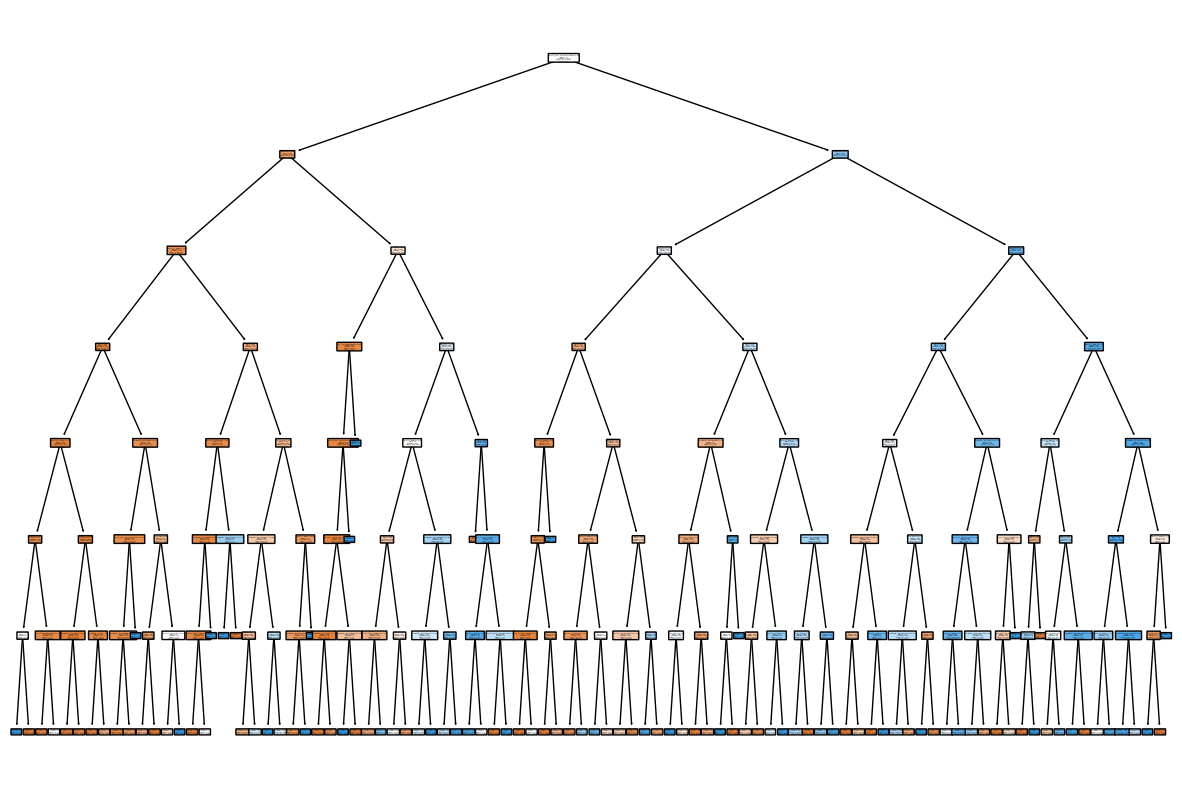

In [31]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError(
    #     'You need to remove "raise NotImplementedErrors" lines after writing your code!'
    # )
    max_depth_7_dt = DecisionTreeClassifier(max_depth=7)
    max_depth_7_dt.fit(X_train, y_train)

    # Visualize the tree
    plt.figure(figsize=(15, 10))
    tree_nodes = tree.plot_tree(
        max_depth_7_dt,
        feature_names=X_train.columns,
        class_names=["<=50K", ">50K"],
        filled=True,
        rounded=True,
    )

    # Prediction path for a sample
    sample = X_test.iloc[0]

    print("_________________________Print Path_________________________")
    # Show the prediction path for the sample
    print_decision_path(max_depth_7_dt, sample.values.reshape(1, -1), tree_nodes)

    sample_pred = max_depth_7_dt.predict(sample.values.reshape(1, -1))
    sample_real = y_test.iloc[0]
    
    print("_________________________Test Sample_________________________")
    print(f"Prediction: {sample_pred[0]}") 
    print(f"Real: {sample_real}")
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (f):</font>**

The decision path for the first testing instance is:
- `marital_status_Married-civ-spouse == False`: True
- `education_num <= 12.5`: True
- `age <= 28.5`: False
- `occupation_Prof-specialty == False`: True
- `marital_status_Married-AF-spouse == False`: True
- `occupation_Exec-managerial == False`: True

The prediction is `<=50K`, which is the same as the true label. The decision path makes sense, because the person is not married, has a low education level, is elder than 28.5, has a job other than professional specialty, is not married to an armed forces spouse, and has a job other than executive managerial.

- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [32]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError(
    #     'You need to remove "raise NotImplementedErrors" lines after writing your code!'
    # )
    def print_feature_importances(clf, feature_names):
        importances = clf.feature_importances_
        indices = np.argsort(importances)[::-1]

        print("Feature ranking:")

        for f in range(len(feature_names)):
            print(
                f"{f + 1}. feature {indices[f]} ({feature_names[indices[f]]}) = {importances[indices[f]]}"
            )

    print_feature_importances(max_depth_7_dt, X_train.columns)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

Feature ranking:
1. feature 13 (marital_status_ Married-civ-spouse) = 0.5408094149866808
2. feature 1 (education) = 0.23245539280990157
3. feature 0 (age) = 0.10775931336573005
4. feature 2 (hours_per_week) = 0.05197161672738558
5. feature 21 (occupation_ Exec-managerial) = 0.011619803597408558
6. feature 25 (occupation_ Other-service) = 0.00668901110058019
7. feature 27 (occupation_ Prof-specialty) = 0.006095127991118954
8. feature 8 (workclass_ Self-emp-not-inc) = 0.005202949152644223
9. feature 37 (sex_ Female) = 0.004488295588910582
10. feature 22 (occupation_ Farming-fishing) = 0.003975680698944072
11. feature 6 (workclass_ Private) = 0.0031471230726965362
12. feature 12 (marital_status_ Married-AF-spouse) = 0.0027581488092928413
13. feature 23 (occupation_ Handlers-cleaners) = 0.002571344367475666
14. feature 35 (race_ Other) = 0.0021294211904557834
15. feature 7 (workclass_ Self-emp-inc) = 0.0021047257152611585
16. feature 38 (sex_ Male) = 0.002085045271182467
17. feature 28 (oc

**<font color='purple'>Answer to (g):</font>**
The most important features are `marital_status_Married-civ-spouse`, `education_num`, `age`, `occupation_Prof-specialty`, `marital_status_Married-AF-spouse`, and `occupation_Exec-managerial`. They are not the same as my guess, as I don't see the `relationship` feature in the most important features. 

The feature importance is the value of the reduction in the criterion (gini or entropy) brought by that feature. The higher the value, the more important the feature is.

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>